# Advanced Pandas Tutorial

This tutorial follows on from tutorial #5 where we introduced Pandas. Here we will be covering more advanced pandas functionality. We will start with small basic datasets and then move to more advanced Treasury datasets.

The functions we will cover will be broken down into 2 sections

1. Combining dataframes with concatenate, merge and join.

### Outline
I. Combining dataframes
    1. Concatenate
    2. Join or Merge
II. Advanced sorting and MultiIndex
    1. Advanced Sorting
    2. MultiIndex



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## I. Combining dataframes
Pandas has three main ways to combine dataframes together. They are very similar and can be used interchangably, but I will present their recommended uses as these will be easiest to learn.

#### CONCATENATE
This will stack the dataframes horizontally or vertically. This should be used if the dataframes to be combined share the same columns (vertically concatenate) or the same index (horizonally concatenate). 


#### MERGE
Merge is typically done when you have two dataframes with a column that contains the same unique identifier (not an index).

#### JOIN
Join is typically used to combine two dataframes that have the same index.

When we get to the join/merge section, we will discuss types of joins/merges. This is very similar to SQL (structured query language) and if you have had any experience with databases, it should be very familiar. All SQL commands can be replicated in pandas. If you are not familiar with SQL, ignore this completely. If you are familiar with SQL, you will really enjoy doing this in pandas directly!

### Creating some basic datasets to work with
We will work with a few different datasets here to explain the topics on a smaller scale.

In [2]:
df1 = pd.DataFrame({'Product':[1,2,3,4],
                    'Warranty':[True,False,True,True],
                    'Price':[9.99, 29.99, 14.99, 49.99],
                    })

# df2 shares the same column names as df1 (and same index)
df2 = pd.DataFrame({'Product':[5,6,7,8],
                    'Warranty':[True,False,False, False],
                    'Price':[19.99, 9.99, 19.99, 49.99],
                    })
# df3 contains different column names than df1, but same index
df3 = pd.DataFrame({'Cost':[2.01, 10.00, 3.00, 21.00],
                    'Units':[300, 200, 350, 300]
                    })

In [3]:
df1

,Product,Warranty,Price
0,1,True,9.99
1,2,False,29.99
2,3,True,14.99
3,4,True,49.99


In [4]:
df2

,Product,Warranty,Price
0,5,True,19.99
1,6,False,9.99
2,7,False,19.99
3,8,False,49.99


In [5]:
df3

,Cost,Units
0,2.01,300
1,10.00,200
2,3.00,350
3,21.00,300


## 1. Concatenation (pd.concat)
Concatenation allows us to stick two dataframes together <b>if the dataframes have identical columns or identical indicies</b>. If the dataframes have the same columns then concatenating them will result in adding one dataframe on top of another dataframe. If the dataframes have the same index, then concatenate will combine all columns and combine the dataframes horizontally. (This is very similar to the numpy functions concatenate, hstack and vstack).

There are two inputs to the pd.concat function. 
 - The first is a list of the dataframes. Since this is a list, then we place them in square brackets [ ] separated by a comma.
 - The second input is which axis we want to use for concatenation.If we want to stack one dataframe on top of the other, we use axis=0. If we want them horizontally (stacked next to each other) then we can use axis=1). 

##### Vertical Concatenation (axis=0)
The dataframes to be concatenated share the same columns.

In [6]:
df_vertical = pd.concat([df1, df2], axis=0)
df_vertical

,Product,Warranty,Price
0,1,True,9.99
1,2,False,29.99
2,3,True,14.99
3,4,True,49.99
0,5,True,19.99
1,6,False,9.99
2,7,False,19.99
3,8,False,49.99


#### NOTE: It looks like our index here is no longer a unique index. To fix this, we can set the ignore_index variable equal to True as an input to the pd.concat function (default was false).

NOTE: There are many default variables with concat, merge and join that allow for a lot of flexibiliy. For now, you can ignore most of these and just focus on the basics.

In [7]:
df_vertical = pd.concat([df1, df2], axis=0, ignore_index = True)
df_vertical

,Product,Warranty,Price
0,1,True,9.99
1,2,False,29.99
2,3,True,14.99
3,4,True,49.99
4,5,True,19.99
5,6,False,9.99
6,7,False,19.99
7,8,False,49.99


###### Horizontal Concatenation (axis=1)
The two dataframes share the same axis.

In [8]:
df1

,Product,Warranty,Price
0,1,True,9.99
1,2,False,29.99
2,3,True,14.99
3,4,True,49.99


In [9]:
df3

,Cost,Units
0,2.01,300
1,10.00,200
2,3.00,350
3,21.00,300


In [10]:
df_horizontal = pd.concat([df1, df3], axis=1)
df_horizontal

,Product,Warranty,Price,Cost,Units
0,1,True,9.99,2.01,300
1,2,False,29.99,10.00,200
2,3,True,14.99,3.00,350
3,4,True,49.99,21.00,300


In [11]:
df_horizontal.columns

Index(['Product', 'Warranty', 'Price', 'Cost', 'Units'], dtype='object')

##### So horizontal concatenation matches the rows by index and puts the data together by adding columns of one dataframe to columns of the other dataframe.

## 2. Join and Merge

<b>Join</b> is used to combine dataframes with the same index, whereas <b>merge</b> is used to merge two dataframes on a unique column. (Remember in pandas you can change the index to a column using the 'set_index()' method, so these are very similar functions and you can use merge or reset the index and use join.)

2 Examples that might make this clearer.

I. Suppose you have three dataframes with different information
     1. Customer information (customer name, address, credit rating, sales contact, etc.) as df_customer
     2. Product information (name of product, sku number, sales price, etc.) as df_product
     3. Billings information (customer name, date of sale, product name, quantity of purchase, etc) as df_billings

To join all of this information together we could take the following steps.
 - Set the df_product index to be the name of the product using df_product.set_index()
 - Set the df_billings index to be the name of the product also.
 - We can now join all of the product information in df_product into the df_billings dataframe.
 - Set the df_customer index to be the name of the customer.
 - Change the df_billings dataframe's index to be customer name as well. (so change this index again)
 - Now we can join all of the customer information into the df_billings dataframe and have all of our data stitched together.
 
To use merge and get all of this information together, you can do the following:
    - merge df_product with df_billings on the name of the product columns (let's still call this df_billings)
    - merge the df_customer to the dataframe created above on customer name.
 
II.  A more relevant example for Treasury might be the following 2 dataframes
 
- df_bonds which is a list of all of the static details of every bond we hold in our portfolios. Fields would include: Cusip, issuance date, maturity date, coupon, frequency of payments, 144A or registered, country of issuance, etc.
- df_bond_values is a list of the prices and ratings (both of which can change over time) for every bond we currently hold in our portfoios. Fields would include CUSIP, Current Market Price, S&P rating, Moody's rating, Fitch rating.
- df_holdings is a list of the bonds held by each investment manager. The fields would include, cusip, purchase date, purchase price, book value on purchase.
    
We can join all of these dataframes by making the index for each equal to the bond cusip (which is a unique identifier for the bonds.)

NOTE: As Emily and Brett already know, to be more specific, we would also need a 'lot' field that uniquely identifies each purchase by an investment manager. If more than one manager buys a bond or if a manager buys a bond twice, the bond will have different book values and we need to track these, but I think everyone gets the point.

#### To work with join and merge, we are going to steal data and tweak data I found from a web site.

https://www.w3resource.com/sql-exercises/sql-joins-exercise-11.php

(You do not need to click on the link above, I just felt that the reference was necessary. Academics would call this plagerism, but programmers call this 'not recreating the wheel.' I am somewhere in the middle.)

In [12]:
cols1 = ['customer_id','cust_name','city','grade']
data1 =     [[3002,'Nick Rimando','New York',100],
            [3007, 'Brad Davis','New York',200],
            [3008, 'Julian Green','London', 300],
            [3004, 'Fabian Johnson','Paris' , 300],
            [3009, 'Geoff Cameron','Berlin', 100],
            [3003, 'Jozy Altidor','Moscow',200],
            [3001, 'Brad Guzan','London',0]]
df_customers = pd.DataFrame(columns = cols1, data=data1)
df_customers = df_customers.sort_values('customer_id')
df_customers

,customer_id,cust_name,city,grade
6,3001,Brad Guzan,London,0
0,3002,Nick Rimando,New York,100
5,3003,Jozy Altidor,Moscow,200
3,3004,Fabian Johnson,Paris,300
1,3007,Brad Davis,New York,200
2,3008,Julian Green,London,300
4,3009,Geoff Cameron,Berlin,100


In [13]:
cols2 = ['rd_no','purch_amt','ord_date','customer_id','salesman_id']
data2 = [[70001,150.5,'10/5/12',3005,5002],
        [70009,270.65,'9/10/12',3001,5005],
        [70005,2400.6,'7/27/12',3007,5001],
        [70010,1983.43,'10/10/12',3004,5006],
        [70003,2480.4,'10/10/12',3006,5003],
        [70011,75.29,'8/17/12',3003,5007],
        [70013,3045.6,'4/25/12',3002,5001]]
df_orders = pd.DataFrame(columns = cols2, data = data2)
df_orders = df_orders.sort_values('customer_id')
df_orders

,rd_no,purch_amt,ord_date,customer_id,salesman_id
1,70009,270.65,9/10/12,3001,5005
6,70013,3045.60,4/25/12,3002,5001
5,70011,75.29,8/17/12,3003,5007
3,70010,1983.43,10/10/12,3004,5006
0,70001,150.50,10/5/12,3005,5002
4,70003,2480.40,10/10/12,3006,5003
2,70005,2400.60,7/27/12,3007,5001


So we have a customer dataframe that has the columns ['customer_id','cust_name','city','grade','salesman_id']

and we have a orders dataframe that contains the columns ['rd_no','purch_amt','ord_date','customer_id','salesman_id']

The customer_id is common across both dataframes, but you will notice they do not contain the same set of customer ids.

In [14]:
df_customers.customer_id

6    3001
0    3002
5    3003
3    3004
1    3007
2    3008
4    3009
Name: customer_id, dtype: int64

In [15]:
df_orders.customer_id

1    3001
6    3002
5    3003
3    3004
0    3005
4    3006
2    3007
Name: customer_id, dtype: int64

The customers dataframe does not contain the ids 3005 and 3006, that are in the orders dataframe.

The orders dataframe does not contain customers 3008 and 3009.

### So <b>HOW</b> do we deal with this?

This is where we have to get into the type of joins.

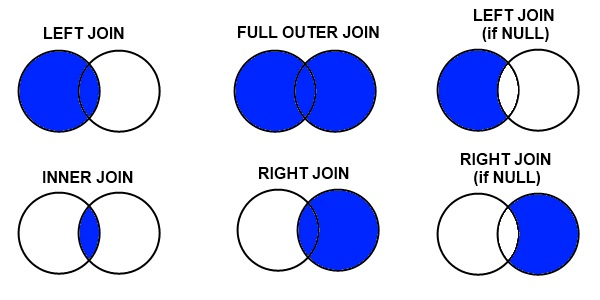

The image above describes the join types. Let's start with the simplest version a 'full outer join'. This will bring back all of the data. 
 - If there is a customer with no order, the customer data will be retained and the order information will be blank.
 - If there is an order with no corresponding customer information, the order information will be retained. 
 
### how = 'outer'

In [16]:
# outer join
df_outer = df_customers.merge(df_orders, how='outer', left_on = 'customer_id', right_on='customer_id', sort=True)
df_outer

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id
0,3001,Brad Guzan,London,0.0,70009.0,270.65,9/10/12,5005.0
1,3002,Nick Rimando,New York,100.0,70013.0,3045.60,4/25/12,5001.0
2,3003,Jozy Altidor,Moscow,200.0,70011.0,75.29,8/17/12,5007.0
3,3004,Fabian Johnson,Paris,300.0,70010.0,1983.43,10/10/12,5006.0
4,3005,NaN,NaN,NaN,70001.0,150.50,10/5/12,5002.0
5,3006,NaN,NaN,NaN,70003.0,2480.40,10/10/12,5003.0
6,3007,Brad Davis,New York,200.0,70005.0,2400.60,7/27/12,5001.0
7,3008,Julian Green,London,300.0,NaN,NaN,NaN,NaN
8,3009,Geoff Cameron,Berlin,100.0,NaN,NaN,NaN,NaN


Notice what happened with the outer join. All of the customer_ids are included in the df_outer dataframe.
 - If there is no informaiton from the df_customers dataframe for this particular customer_id, then the dataframe is filled with 'NaN's. (such as customer_id 3005 and 3006)

 - If there are no entries in the df_orders dataframe for a customer (such as 3008 and 3009) then the df_outer dataframe is filled with Nans.

Let's talk about the syntax of the merge statement.
 - df_left.merge(df_right, ...  The first dataframe listed is on the left and we are using the merge method on this dataframe. We then need to specify, as the first arguement to the method, the right dataframe. (Please do not write joins while looking at a reflection in the mirror! It will be much more difficult.)
 
 - how = 'outer'..... This tells pandas to keep all of the data and do an outer join on the merge.
 
 - left_on = '....', right_on = '...' This tells pandas what columns to look at when merging the dataframes. In this particular case, both dataframes have the same name for the customer id('customer_id') We could redo the merge using just on='customer_id and not specify the left and right.
 


In [17]:
# using 'on' versus left_on and right_on since the column names are identical./
df_outer = df_customers.merge(df_orders, how='outer', on = 'customer_id', sort=True)
df_outer

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id
0,3001,Brad Guzan,London,0.0,70009.0,270.65,9/10/12,5005.0
1,3002,Nick Rimando,New York,100.0,70013.0,3045.60,4/25/12,5001.0
2,3003,Jozy Altidor,Moscow,200.0,70011.0,75.29,8/17/12,5007.0
3,3004,Fabian Johnson,Paris,300.0,70010.0,1983.43,10/10/12,5006.0
4,3005,NaN,NaN,NaN,70001.0,150.50,10/5/12,5002.0
5,3006,NaN,NaN,NaN,70003.0,2480.40,10/10/12,5003.0
6,3007,Brad Davis,New York,200.0,70005.0,2400.60,7/27/12,5001.0
7,3008,Julian Green,London,300.0,NaN,NaN,NaN,NaN
8,3009,Geoff Cameron,Berlin,100.0,NaN,NaN,NaN,NaN


___
### how = 'inner'
An inner join will only return information for rows that are in both dataframes.

In [18]:
# using 'on' versus left_on and right_on since the column names are identical./
df_inner = df_customers.merge(df_orders, how='inner', on = 'customer_id', sort=True)
df_inner

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id
0,3001,Brad Guzan,London,0,70009,270.65,9/10/12,5005
1,3002,Nick Rimando,New York,100,70013,3045.60,4/25/12,5001
2,3003,Jozy Altidor,Moscow,200,70011,75.29,8/17/12,5007
3,3004,Fabian Johnson,Paris,300,70010,1983.43,10/10/12,5006
4,3007,Brad Davis,New York,200,70005,2400.60,7/27/12,5001


As you can see the inner join returns the data from both dataframes for customers that are in both dataframes.

So when would you want to use this type of join? Suppose you want to consider how our peers share price have performed after they announced share repurchase plans. To do this, you have two dataframes.
1. df_equity_prices that includeds the daily share price history of all public US companies.
2. df_technology_peers that includes names of firms that business development and the business units consider to be our peers.

 - Not all of our peers are public, so we will not have financial information on them.
 - Not all public firms are our peers, so we do not want to keep them in the analysis.
 
 An inner join works great here.
 
 #### Note: Inner joins in excel are a complete ZOO!! Pandas makes these considerably easier.

___
### how = 'left'
A left join keeps every item in the left dataframe and will supplement these items with the information in the right dataframe. 

In [19]:
# using 'on' versus left_on and right_on since the column names are identical./
df_left = df_customers.merge(df_orders, how='left', on = 'customer_id', sort=True)
df_left

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id
0,3001,Brad Guzan,London,0,70009.0,270.65,9/10/12,5005.0
1,3002,Nick Rimando,New York,100,70013.0,3045.60,4/25/12,5001.0
2,3003,Jozy Altidor,Moscow,200,70011.0,75.29,8/17/12,5007.0
3,3004,Fabian Johnson,Paris,300,70010.0,1983.43,10/10/12,5006.0
4,3007,Brad Davis,New York,200,70005.0,2400.60,7/27/12,5001.0
5,3008,Julian Green,London,300,NaN,NaN,NaN,NaN
6,3009,Geoff Cameron,Berlin,100,NaN,NaN,NaN,NaN


___
### how = 'right'
This will keep only customer_ids from the df_orders dataframe. If there is a match with the df_customer, then this information will be populated.

In [20]:
df_right = df_customers.merge(df_orders, how='right', on = 'customer_id', sort=True)
df_right

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id
0,3001,Brad Guzan,London,0.0,70009,270.65,9/10/12,5005
1,3002,Nick Rimando,New York,100.0,70013,3045.60,4/25/12,5001
2,3003,Jozy Altidor,Moscow,200.0,70011,75.29,8/17/12,5007
3,3004,Fabian Johnson,Paris,300.0,70010,1983.43,10/10/12,5006
4,3005,NaN,NaN,NaN,70001,150.50,10/5/12,5002
5,3006,NaN,NaN,NaN,70003,2480.40,10/10/12,5003
6,3007,Brad Davis,New York,200.0,70005,2400.60,7/27/12,5001


### Merge Indicator

Pandas has a very useful boolean input variable to the merge method called 'indicator'. The default, that we have used this far, is False.) Let's do a full outer merge again and set the indicator to False.

In [21]:
df_outer = df_customers.merge(df_orders, how='outer', on = 'customer_id', sort=True, indicator=True)
df_outer

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id,_merge
0,3001,Brad Guzan,London,0.0,70009.0,270.65,9/10/12,5005.0,both
1,3002,Nick Rimando,New York,100.0,70013.0,3045.60,4/25/12,5001.0,both
2,3003,Jozy Altidor,Moscow,200.0,70011.0,75.29,8/17/12,5007.0,both
3,3004,Fabian Johnson,Paris,300.0,70010.0,1983.43,10/10/12,5006.0,both
4,3005,NaN,NaN,NaN,70001.0,150.50,10/5/12,5002.0,right_only
5,3006,NaN,NaN,NaN,70003.0,2480.40,10/10/12,5003.0,right_only
6,3007,Brad Davis,New York,200.0,70005.0,2400.60,7/27/12,5001.0,both
7,3008,Julian Green,London,300.0,NaN,NaN,NaN,NaN,left_only
8,3009,Geoff Cameron,Berlin,100.0,NaN,NaN,NaN,NaN,left_only


The resulting merged dataframe has a new column '_merge'. This indicates if the row contains data from both the dataframes or if it come from the left_only or right_only. This is very useful if we want to to LEFT JOIN (if NULL) or RIGHT JOIN (if NULL) merges and joins.

### RIGHT JOIN (if NULL)

Let's do a RIGHT JOIN if NULL merge here. So we want all of the data for orders that are assigned to a customer_id that are NOT in the customer dataframe (df_customers). This might be necessary to identify who is slacking on the deal desk and has not entered the necessary information to get the customer billed.

In [22]:
df_call_deal_desk = df_customers.merge(df_orders,how='outer', on = 'customer_id', sort=True, indicator=True)
df_call_deal_desk = df_call_deal_desk[df_call_deal_desk['_merge']=='right_only']
df_call_deal_desk

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id,_merge
4,3005,NaN,NaN,NaN,70001.0,150.5,10/5/12,5002.0,right_only
5,3006,NaN,NaN,NaN,70003.0,2480.4,10/10/12,5003.0,right_only


So we have a dataframe where we have indentified only orders that do not have any customer orders

### LEFT JOIN (if NULL)

Suppose instead we want to find all of our customers that have not ordered anything so we can wake up our salepeople and get them working.

In [23]:
df_wake_up_salesperson = df_customers.merge(df_orders,how='outer', on = 'customer_id', sort=True, indicator=True)
df_wake_up_salesperson = df_wake_up_salesperson[df_wake_up_salesperson['_merge']=='left_only']
df_wake_up_salesperson

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id,_merge
7,3008,Julian Green,London,300.0,NaN,NaN,NaN,NaN,left_only
8,3009,Geoff Cameron,Berlin,100.0,NaN,NaN,NaN,NaN,left_only


### OK, but what about JOIN vs. MERGE???

As we mentioned earlier, join us usually used when we are comparing the indicies of the dataframes. Let's do an inner join on customer_id using the JOIN versus merge. To do this, we first need to set the index of both dataframes to be customer_id.

In [24]:
df_orders = df_orders.set_index('customer_id')
df_orders

,rd_no,purch_amt,ord_date,salesman_id
customer_id,,,,
3001,70009,270.65,9/10/12,5005
3002,70013,3045.60,4/25/12,5001
3003,70011,75.29,8/17/12,5007
3004,70010,1983.43,10/10/12,5006
3005,70001,150.50,10/5/12,5002
3006,70003,2480.40,10/10/12,5003
3007,70005,2400.60,7/27/12,5001


In [25]:
df_customers = df_customers.set_index('customer_id')
df_customers

,cust_name,city,grade
customer_id,,,
3001,Brad Guzan,London,0
3002,Nick Rimando,New York,100
3003,Jozy Altidor,Moscow,200
3004,Fabian Johnson,Paris,300
3007,Brad Davis,New York,200
3008,Julian Green,London,300
3009,Geoff Cameron,Berlin,100


In [26]:
df_inner_join = df_customers.join(df_orders, how='inner')
df_inner_join

,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id
customer_id,,,,,,,
3001,Brad Guzan,London,0,70009,270.65,9/10/12,5005
3002,Nick Rimando,New York,100,70013,3045.60,4/25/12,5001
3003,Jozy Altidor,Moscow,200,70011,75.29,8/17/12,5007
3004,Fabian Johnson,Paris,300,70010,1983.43,10/10/12,5006
3007,Brad Davis,New York,200,70005,2400.60,7/27/12,5001


So does this look like the df_inner we created with the merge method?

In [27]:
df_inner

,customer_id,cust_name,city,grade,rd_no,purch_amt,ord_date,salesman_id
0,3001,Brad Guzan,London,0,70009,270.65,9/10/12,5005
1,3002,Nick Rimando,New York,100,70013,3045.60,4/25/12,5001
2,3003,Jozy Altidor,Moscow,200,70011,75.29,8/17/12,5007
3,3004,Fabian Johnson,Paris,300,70010,1983.43,10/10/12,5006
4,3007,Brad Davis,New York,200,70005,2400.60,7/27/12,5001


Yes, the only difference is that the dataframe we created with join has the customer_id as the index. We explicitly set this before we did the join. Otherwise, the data is the same.

##### What if there are more like columns???
So what happens if we have a dataframe that contains more than one column that are similarly names? Pandas join and merge have input variables lsuffix and rsiffix (for left suffix and right suffix) that can be specified such that both columns will be displayed. This is a little unclear from my description, but hopefully the example below will shed some light on how to use the lsuffix and rsuffix inputs.

Let's redo the customer database and include the column 'salesman_id'. Note: This is also in the df_orders dataframe.

In [28]:
cols1 = ['customer_id','cust_name','city','grade','salesman_id']
data1 =     [[3002,'Nick Rimando','New York',100,5001],
            [3007, 'Brad Davis','New York',200,5001],
            [3008, 'Julian Green','London', 300, 5002],
            [3004, 'Fabian Johnson','Paris' , 300, 5006],
            [3009, 'Geoff Cameron','Berlin', 100, 5003],
            [3003, 'Jozy Altidor','Moscow',200,5007],
            [3001, 'Brad Guzan','London',0,5005]]
df_customers = pd.DataFrame(columns = cols1, data=data1)
df_customers = df_customers.sort_values('customer_id')
df_customers = df_customers.set_index('customer_id')
df_customers

,cust_name,city,grade,salesman_id
customer_id,,,,
3001,Brad Guzan,London,0,5005
3002,Nick Rimando,New York,100,5001
3003,Jozy Altidor,Moscow,200,5007
3004,Fabian Johnson,Paris,300,5006
3007,Brad Davis,New York,200,5001
3008,Julian Green,London,300,5002
3009,Geoff Cameron,Berlin,100,5003


Now let's try a join specifying a lsuffix and rsuffix.

In [29]:
df_inner_join = df_customers.join(df_orders, how='outer', lsuffix='_cust', rsuffix='_orders')
df_inner_join

,cust_name,city,grade,salesman_id_cust,rd_no,purch_amt,ord_date,salesman_id_orders
customer_id,,,,,,,,
3001,Brad Guzan,London,0.0,5005.0,70009.0,270.65,9/10/12,5005.0
3002,Nick Rimando,New York,100.0,5001.0,70013.0,3045.60,4/25/12,5001.0
3003,Jozy Altidor,Moscow,200.0,5007.0,70011.0,75.29,8/17/12,5007.0
3004,Fabian Johnson,Paris,300.0,5006.0,70010.0,1983.43,10/10/12,5006.0
3005,NaN,NaN,NaN,NaN,70001.0,150.50,10/5/12,5002.0
3006,NaN,NaN,NaN,NaN,70003.0,2480.40,10/10/12,5003.0
3007,Brad Davis,New York,200.0,5001.0,70005.0,2400.60,7/27/12,5001.0
3008,Julian Green,London,300.0,5002.0,NaN,NaN,NaN,NaN
3009,Geoff Cameron,Berlin,100.0,5003.0,NaN,NaN,NaN,NaN


We now have two columns for salesman_id. salesman_id_cust which contains the salesman_id from the customer dataframe and salesman_id_orders that is from the orders dataframe.

### NOTE on Datatypes and merge and join. 
Pandas does something that appears to be strange when merging dataframes. Some of the integer columns were transformed to floating point numbers (so you can see decimals) after they were merged or joined. Pandas wants everything in a column to be the same datatype. NaNs are floating point numbers in python. So when we merge a column that is an integer with another dataframe and recieve a NaN in the column, all of the values in that column are converted to floating point numbers. 

This is just an FYI!

## II. Advanced Sorting and MultiIndex

## 1. Advanced Sorting
In the Pandas_Excel_Reference notebook we briefly discussed sorting a dataframe by values or by the index. We briefly go over this with multiple columns.

In [31]:
# loading up the FX database for sorting
df_FX = pd.read_excel('../data/FX_DERIVATIVES_SOME.XLSX', sheet_name='forwards')
df_FX.head(10)

,ID,Entity,Counterparty,Currency_Pair,Buy_Currency,Sell_Currency,Trade_Date,Delivery_Date,Contract_Rate,Buy_Amount,Sell_Amount
0,ADIR3725,ADIR,RBS,USDJPY,USD,JPY,2012-08-15,2012-10-10,78.867000,4564647.0,-360000000
1,ADUS813,ADUS,CITI,EURUSD,USD,EUR,2012-08-15,2012-10-11,1.229378,614689.0,-500000
2,ADIR3723,ADIR,GS,USDCHF,CHF,USD,2012-08-14,2012-09-19,0.973454,9000000.0,-9245429
3,ADIR3719,ADIR,UBS,EURUSD,USD,EUR,2012-08-13,2012-10-10,1.233346,6166730.0,-5000000
4,ADUS810,ADUS,CITI,EURUSD,EUR,USD,2012-08-09,2012-10-11,1.229400,1000000.0,-1229400
5,ADIR3717,ADIR,CITI,USDSGD,USD,SGD,2012-08-09,2012-09-14,1.245248,1204579.0,-1500000
6,ADIR3715,ADIR,BOA,USDJPY,USD,JPY,2012-08-09,2012-10-10,78.522600,3820556.0,-300000000
7,ADUS808,ADUS,CITI,USDCHF,CHF,USD,2012-08-08,2012-11-16,0.970400,61000000.0,-62860676
8,ADIR3709,ADIR,BOA,USDJPY,USD,JPY,2012-08-06,2012-10-10,78.126100,3839946.0,-300000000
9,ADIR3708,ADIR,BOA,EURUSD,USD,EUR,2012-08-06,2012-10-10,1.240847,3722541.0,-3000000


In [32]:
# sort by ID
df_FX = df_FX.sort_values(by='ID')
df_FX.head(10)

,ID,Entity,Counterparty,Currency_Pair,Buy_Currency,Sell_Currency,Trade_Date,Delivery_Date,Contract_Rate,Buy_Amount,Sell_Amount
34,ADIR3551,ADIR,JPM,EURUSD,USD,EUR,2012-03-20,2012-10-12,1.324263,177980947.0,-134400000
32,ADIR3677,ADIR,BOA,AUDUSD,USD,AUD,2012-07-10,2012-09-12,1.014912,1522368.0,-1500000
31,ADIR3678,ADIR,CITI,USDSGD,USD,SGD,2012-07-10,2012-09-14,1.266689,2763109.0,-3500000
29,ADIR3683,ADIR,CITI,EURUSD,USD,EUR,2012-07-12,2012-09-12,1.220399,3661197.0,-3000000
28,ADIR3685,ADIR,CITI,AUDUSD,USD,AUD,2012-07-12,2012-09-12,1.008853,5044265.0,-5000000
27,ADIR3686,ADIR,BOA,EURUSD,USD,EUR,2012-07-16,2012-09-12,1.226307,6131535.0,-5000000
26,ADIR3687,ADIR,GS,GBPUSD,USD,GBP,2012-07-16,2012-09-12,1.562082,2343123.0,-1500000
23,ADIR3693,ADIR,CITI,AUDUSD,USD,AUD,2012-07-19,2012-09-12,1.037835,2075670.0,-2000000
22,ADIR3694,ADIR,BOA,GBPUSD,USD,GBP,2012-07-23,2012-09-26,1.551328,2326992.0,-1500000
21,ADIR3696,ADIR,BOA,USDJPY,USD,JPY,2012-07-24,2012-09-26,78.117600,5120485.0,-400000000


In [34]:
# sort by index
df_FX = df_FX.sort_index()
df_FX.head(10)

,ID,Entity,Counterparty,Currency_Pair,Buy_Currency,Sell_Currency,Trade_Date,Delivery_Date,Contract_Rate,Buy_Amount,Sell_Amount
0,ADIR3725,ADIR,RBS,USDJPY,USD,JPY,2012-08-15,2012-10-10,78.867000,4564647.0,-360000000
1,ADUS813,ADUS,CITI,EURUSD,USD,EUR,2012-08-15,2012-10-11,1.229378,614689.0,-500000
2,ADIR3723,ADIR,GS,USDCHF,CHF,USD,2012-08-14,2012-09-19,0.973454,9000000.0,-9245429
3,ADIR3719,ADIR,UBS,EURUSD,USD,EUR,2012-08-13,2012-10-10,1.233346,6166730.0,-5000000
4,ADUS810,ADUS,CITI,EURUSD,EUR,USD,2012-08-09,2012-10-11,1.229400,1000000.0,-1229400
5,ADIR3717,ADIR,CITI,USDSGD,USD,SGD,2012-08-09,2012-09-14,1.245248,1204579.0,-1500000
6,ADIR3715,ADIR,BOA,USDJPY,USD,JPY,2012-08-09,2012-10-10,78.522600,3820556.0,-300000000
7,ADUS808,ADUS,CITI,USDCHF,CHF,USD,2012-08-08,2012-11-16,0.970400,61000000.0,-62860676
8,ADIR3709,ADIR,BOA,USDJPY,USD,JPY,2012-08-06,2012-10-10,78.126100,3839946.0,-300000000
9,ADIR3708,ADIR,BOA,EURUSD,USD,EUR,2012-08-06,2012-10-10,1.240847,3722541.0,-3000000


In [35]:
# Sort by two columns requires us to just use a list in the by=['col_a', 'col_b']
df_FX = df_FX.sort_values(by=['Currency_Pair', 'Trade_Date'])
df_FX.head(20)

,ID,Entity,Counterparty,Currency_Pair,Buy_Currency,Sell_Currency,Trade_Date,Delivery_Date,Contract_Rate,Buy_Amount,Sell_Amount
32,ADIR3677,ADIR,BOA,AUDUSD,USD,AUD,2012-07-10,2012-09-12,1.014912,1.522368e+06,-1500000
28,ADIR3685,ADIR,CITI,AUDUSD,USD,AUD,2012-07-12,2012-09-12,1.008853,5.044265e+06,-5000000
23,ADIR3693,ADIR,CITI,AUDUSD,USD,AUD,2012-07-19,2012-09-12,1.037835,2.075670e+06,-2000000
20,ADIR3697,ADIR,BOA,AUDUSD,USD,AUD,2012-07-25,2012-09-26,1.023726,1.637962e+06,-1600000
18,ADIR3698,ADIR,BOA,AUDUSD,USD,AUD,2012-07-26,2012-09-26,1.034292,8.274336e+06,-8000000
10,ADIR3707,ADIR,GS,AUDUSD,USD,AUD,2012-08-03,2012-09-26,1.051216,8.409728e+06,-8000000
35,NDBV169,NDBV,BOA,EURKRW,EUR,KRW,2020-03-13,2020-03-17,1371.700000,2.267166e+06,-3109871282
34,ADIR3551,ADIR,JPM,EURUSD,USD,EUR,2012-03-20,2012-10-12,1.324263,1.779809e+08,-134400000
29,ADIR3683,ADIR,CITI,EURUSD,USD,EUR,2012-07-12,2012-09-12,1.220399,3.661197e+06,-3000000
27,ADIR3686,ADIR,BOA,EURUSD,USD,EUR,2012-07-16,2012-09-12,1.226307,6.131535e+06,-5000000


In [37]:
# Sort by three columns Counterparty first, currency pair and then trade date
df_FX = df_FX.sort_values(by=['Counterparty', 'Currency_Pair', 'Trade_Date'])
df_FX.head(20)

,ID,Entity,Counterparty,Currency_Pair,Buy_Currency,Sell_Currency,Trade_Date,Delivery_Date,Contract_Rate,Buy_Amount,Sell_Amount
32,ADIR3677,ADIR,BOA,AUDUSD,USD,AUD,2012-07-10,2012-09-12,1.014912,1522368.00,-1500000
20,ADIR3697,ADIR,BOA,AUDUSD,USD,AUD,2012-07-25,2012-09-26,1.023726,1637962.00,-1600000
18,ADIR3698,ADIR,BOA,AUDUSD,USD,AUD,2012-07-26,2012-09-26,1.034292,8274336.00,-8000000
35,NDBV169,NDBV,BOA,EURKRW,EUR,KRW,2020-03-13,2020-03-17,1371.700000,2267165.77,-3109871282
27,ADIR3686,ADIR,BOA,EURUSD,USD,EUR,2012-07-16,2012-09-12,1.226307,6131535.00,-5000000
14,ADIR3703,ADIR,BOA,EURUSD,USD,EUR,2012-08-01,2012-09-26,1.230760,4923040.00,-4000000
9,ADIR3708,ADIR,BOA,EURUSD,USD,EUR,2012-08-06,2012-10-10,1.240847,3722541.00,-3000000
22,ADIR3694,ADIR,BOA,GBPUSD,USD,GBP,2012-07-23,2012-09-26,1.551328,2326992.00,-1500000
21,ADIR3696,ADIR,BOA,USDJPY,USD,JPY,2012-07-24,2012-09-26,78.117600,5120485.00,-400000000
8,ADIR3709,ADIR,BOA,USDJPY,USD,JPY,2012-08-06,2012-10-10,78.126100,3839946.00,-300000000


## 2. MultiIndex

In pandas you can create a multi-level index. This is very helpful when you will need to look at your data in different sections based on many of the columns names. You can create a multi-level index when creating a dataframe by using the pd.MultiIndex and then constructing a dataframe with that index. I would not bother looking at the code for pd.MultiIndex() however, because most of the multi-level indicies you will create will be created AFTER the dataframe is already constructed. 

An index is an object (like everything in pandas) and it can have many levels. The default in pandas is 1 level. If we are talking about the dataframe above (df_FX) the index is an integer like the rows in excel. The column index is the column names. These are both one level as of now.

In [40]:
df_FX.index

Int64Index([32, 20, 18, 35, 27, 14,  9, 22, 21,  8,  6, 28, 23, 29, 25,  4,  1,
            17, 11,  7, 33, 16, 30, 31, 12,  5, 10, 26, 24,  2, 34,  0, 19, 15,
             3, 13],
           dtype='int64')

In [41]:
df_FX.columns

Index(['ID', 'Entity', 'Counterparty', 'Currency_Pair', 'Buy_Currency',
       'Sell_Currency', 'Trade_Date', 'Delivery_Date', 'Contract_Rate',
       'Buy_Amount', 'Sell_Amount'],
      dtype='object')

Suppose we want to create levels to our row index. Suppose we want our levels to be the following:

Level: Description
    1. Entity
    2. Currency Pair
    3. Trade Date
    
To do this, all we have to do is use the set_index method and provide a list as an input to the method. The first element in the list will be the first level. The second element will be the second level and so on. 

Note: You will want to use the sort_index() method on the dataframe after creating a multi-level index or it looks ugly.

In [44]:
df_FX_multi = df_FX.set_index(['Entity', 'Currency_Pair', 'Trade_Date'], sorted)
df_FX_multi = df_FX_multi.sort_index()
df_FX_multi

ID Counterparty Buy_Currency  \
Entity Currency_Pair Trade_Date                                       
ADIR   AUDUSD        2012-07-10  ADIR3677          BOA          USD   
                     2012-07-12  ADIR3685         CITI          USD   
                     2012-07-19  ADIR3693         CITI          USD   
                     2012-07-25  ADIR3697          BOA          USD   
                     2012-07-26  ADIR3698          BOA          USD   
                     2012-08-03  ADIR3707           GS          USD   
       EURUSD        2012-03-20  ADIR3551          JPM          USD   
                     2012-07-12  ADIR3683         CITI          USD   
                     2012-07-16  ADIR3686          BOA          USD   
                     2012-07-26  ADIR3699          UBS          USD   
                     2012-07-31  ADIR3702          UBS          USD   
                     2012-08-01  ADIR3703          BOA          USD   
                     2012-08-06  ADIR3708          BOA          USD   
                     2012-08-13  ADIR3719          UBS          USD   
       GBPUSD        2012-07-16  ADIR3687           GS          USD   
                     2012-07-23  ADIR3694          BOA          USD   
                     2012-07-26  ADIR3700         CITI          USD   
                     2012-08-01  ADIR3704          UBS          USD   
       USDCHF        2012-08-14  ADIR3723           GS          CHF   
       USDJPY        2012-07-24  ADIR3696          BOA          USD   
                     2012-07-26  ADIR3701         CITI          USD   
                     2012-08-06  ADIR3709          BOA          USD   
                     2012-08-09  ADIR3715          BOA          USD   
                     2012-08-15  ADIR3725          RBS          USD   
       USDSGD        2012-07-10  ADIR3678         CITI          USD   
                     2012-08-01  ADIR3705         CITI          SGD   
                     2012-08-09  ADIR3717         CITI          USD   
ADUS   EURUSD        2012-07-17   ADUS799         CITI          EUR   
                     2012-08-09   ADUS810         CITI          EUR   
                     2012-08-15   ADUS813         CITI          USD   
       GBPUSD        2012-08-02   ADUS807         CITI          USD   
       USDCAD        2012-07-17   ADUS802           GS          CAD   
       USDCHF        2012-08-08   ADUS808         CITI          CHF   
AILP   USDILS        2012-06-20   AILP469         CITI          ILS   
       USDRON        2012-07-11   AILP472         CITI          USD   
NDBV   EURKRW        2020-03-13   NDBV169          BOA          EUR   

                                Sell_Currency Delivery_Date  Contract_Rate  \
Entity Currency_Pair Trade_Date                                              
ADIR   AUDUSD        2012-07-10           AUD    2012-09-12       1.014912   
                     2012-07-12           AUD    2012-09-12       1.008853   
                     2012-07-19           AUD    2012-09-12       1.037835   
                     2012-07-25           AUD    2012-09-26       1.023726   
                     2012-07-26           AUD    2012-09-26       1.034292   
                     2012-08-03           AUD    2012-09-26       1.051216   
       EURUSD        2012-03-20           EUR    2012-10-12       1.324263   
                     2012-07-12           EUR    2012-09-12       1.220399   
                     2012-07-16           EUR    2012-09-12       1.226307   
                     2012-07-26           EUR    2012-09-26       1.229099   
                     2012-07-31           EUR    2012-09-26       1.231283   
                     2012-08-01           EUR    2012-09-26       1.230760   
                     2012-08-06           EUR    2012-10-10       1.240847   
                     2012-08-13           EUR    2012-10-10       1.233346   
       GBPUSD        2012-07-16           GBP    2012-09-12       1.562082   
              

Notice how this got sorted. 
 - First, it is sorted by level 1 (Entity).
 - Within each entity, we then have a sort for the currency pair, which is level 2.
 - Then within each currency pair, it is sorted by the trade date.

By default the indicies are only shown once on the first row that they appear. (This can be changed, but you will have to read the docs to get the details.

So what does this index look like? As you can see below, it is stored as a list of tuples. Each tuple has three elements in it, one for the entity, next the currency pair and finally the trade date.

In [48]:
df_FX_multi.index

MultiIndex([('ADIR', 'AUDUSD', '2012-07-10'),
            ('ADIR', 'AUDUSD', '2012-07-12'),
            ('ADIR', 'AUDUSD', '2012-07-19'),
            ('ADIR', 'AUDUSD', '2012-07-25'),
            ('ADIR', 'AUDUSD', '2012-07-26'),
            ('ADIR', 'AUDUSD', '2012-08-03'),
            ('ADIR', 'EURUSD', '2012-03-20'),
            ('ADIR', 'EURUSD', '2012-07-12'),
            ('ADIR', 'EURUSD', '2012-07-16'),
            ('ADIR', 'EURUSD', '2012-07-26'),
            ('ADIR', 'EURUSD', '2012-07-31'),
            ('ADIR', 'EURUSD', '2012-08-01'),
            ('ADIR', 'EURUSD', '2012-08-06'),
            ('ADIR', 'EURUSD', '2012-08-13'),
            ('ADIR', 'GBPUSD', '2012-07-16'),
            ('ADIR', 'GBPUSD', '2012-07-23'),
            ('ADIR', 'GBPUSD', '2012-07-26'),
            ('ADIR', 'GBPUSD', '2012-08-01'),
            ('ADIR', 'USDCHF', '2012-08-14'),
            ('ADIR', 'USDJPY', '2012-07-24'),
            ('ADIR', 'USDJPY', '2012-07-26'),
            ('ADIR', 'USDJPY', '20

What is different now, besides the three levels, is that the levels have a name for each of them.

NameError: name 'dtype' is not defined

To access parts of the dataframe, you can use loc

In [51]:
df_FX_multi.loc[('NDBV')]

,,ID,Counterparty,Buy_Currency,Sell_Currency,Delivery_Date,Contract_Rate,Buy_Amount,Sell_Amount
Currency_Pair,Trade_Date,,,,,,,,
EURKRW,2020-03-13,NDBV169,BOA,EUR,KRW,2020-03-17,1371.7,2267165.77,-3109871282


In [53]:
df_FX_multi.loc[('ADIR', 'EURUSD')]

,ID,Counterparty,Buy_Currency,Sell_Currency,Delivery_Date,Contract_Rate,Buy_Amount,Sell_Amount
Trade_Date,,,,,,,,
2012-03-20,ADIR3551,JPM,USD,EUR,2012-10-12,1.324263,177980947.0,-134400000
2012-07-12,ADIR3683,CITI,USD,EUR,2012-09-12,1.220399,3661197.0,-3000000
2012-07-16,ADIR3686,BOA,USD,EUR,2012-09-12,1.226307,6131535.0,-5000000
2012-07-26,ADIR3699,UBS,USD,EUR,2012-09-26,1.229099,8603693.0,-7000000
2012-07-31,ADIR3702,UBS,USD,EUR,2012-09-26,1.231283,6772056.0,-5500000
2012-08-01,ADIR3703,BOA,USD,EUR,2012-09-26,1.230760,4923040.0,-4000000
2012-08-06,ADIR3708,BOA,USD,EUR,2012-10-10,1.240847,3722541.0,-3000000
2012-08-13,ADIR3719,UBS,USD,EUR,2012-10-10,1.233346,6166730.0,-5000000


In [76]:
df_FX_multi.loc[('ADIR', 'EURUSD', '2012-07-12')]

ID                          ADIR3683
Counterparty                    CITI
Buy_Currency                     USD
Sell_Currency                    EUR
Delivery_Date    2012-09-12 00:00:00
Contract_Rate                 1.2204
Buy_Amount                3.6612e+06
Sell_Amount                 -3000000
Name: (ADIR, EURUSD, 2012-07-12 00:00:00), dtype: object

Note: Since this returns only one trade, pandas returns a series here and not a datframe.

Lets introduce another pandas function called IndexSlice that is very helpful in selecting parts of a multiIndex.

First we create a variable (index_slice) that is an pd.IndexSlice. Then we reference this variable in a loc method by putting the slices in a list.
For example, if we wanted to see the indices ARIR to ADUS (these are alphabetical and wanted to see every currency pair, but only for the dates of september 2012, we could reference these slices in the loc statement. The syntax would be :

df.loc[index_slice['ADIR':'ADUS', :, '2012-09-01':'2012-09-30'], :]

In [78]:
index_slice = pd.IndexSlice
df_sliced = df_FX_multi.loc[index_slice['ADIR':'ADUS', :, '2012-07-01':'2012-07-31'], :]
df_sliced

ID Counterparty Buy_Currency  \
Entity Currency_Pair Trade_Date                                       
ADIR   AUDUSD        2012-07-10  ADIR3677          BOA          USD   
                     2012-07-12  ADIR3685         CITI          USD   
                     2012-07-19  ADIR3693         CITI          USD   
                     2012-07-25  ADIR3697          BOA          USD   
                     2012-07-26  ADIR3698          BOA          USD   
       EURUSD        2012-07-12  ADIR3683         CITI          USD   
                     2012-07-16  ADIR3686          BOA          USD   
                     2012-07-26  ADIR3699          UBS          USD   
                     2012-07-31  ADIR3702          UBS          USD   
       GBPUSD        2012-07-16  ADIR3687           GS          USD   
                     2012-07-23  ADIR3694          BOA          USD   
                     2012-07-26  ADIR3700         CITI          USD   
       USDJPY        2012-07-24  ADIR3696          BOA          USD   
                     2012-07-26  ADIR3701         CITI          USD   
       USDSGD        2012-07-10  ADIR3678         CITI          USD   
ADUS   EURUSD        2012-07-17   ADUS799         CITI          EUR   
       USDCAD        2012-07-17   ADUS802           GS          CAD   

                                Sell_Currency Delivery_Date  Contract_Rate  \
Entity Currency_Pair Trade_Date                                              
ADIR   AUDUSD        2012-07-10           AUD    2012-09-12       1.014912   
                     2012-07-12           AUD    2012-09-12       1.008853   
                     2012-07-19           AUD    2012-09-12       1.037835   
                     2012-07-25           AUD    2012-09-26       1.023726   
                     2012-07-26           AUD    2012-09-26       1.034292   
       EURUSD        2012-07-12           EUR    2012-09-12       1.220399   
                     2012-07-16           EUR    2012-09-12       1.226307   
                     2012-07-26           EUR    2012-09-26       1.229099   
                     2012-07-31           EUR    2012-09-26       1.231283   
       GBPUSD        2012-07-16           GBP    2012-09-12       1.562082   
                     2012-07-23           GBP    2012-09-26       1.551328   
                     2012-07-26           GBP    2012-09-26       1.568824   
       USDJPY        2012-07-24           JPY    2012-09-26      78.117600   
                     2012-07-26           JPY    2012-09-26      78.236700   
       USDSGD        2012-07-10           SGD    2012-09-14       1.266689   
ADUS   EURUSD        2012-07-17           USD    2012-10-11       1.228709   
       USDCAD        2012-07-17           USD    2012-09-13       1.014444   

                                 Buy_Amount  Sell_Amount  
Entity Currency_Pair Trade_Date                           
ADIR   AUDUSD        2012-07-10   1522368.0     -1500000  
                     2012-07-12   5044265.0     -5000000  
                     2012-07-19   2075670.0     -2000000  
                     2012-07-25   1637962.0     -1600000  
                     2012-07-26   8274336.0     -8000000  
       EURUSD        2012-07-12   3661197.0     -3000000  
                     2012-07-16   6131535.0     -5000000  
                     2012-07-26   8603693.0     -7000000  
                     2012-07-31   6772056.0     -5500000  
       GBPUSD        2012-07-16   2343123.0     -1500000  
                     2012-07-23   2326992.0     -1500000  
                     2012-07-26   7059708.0     -4500000  
       USDJPY        2012-07-24   5120485.0   -400000000  
                     2012-07-26   3834518.0   -300000000  
       USDSGD        2012-07-10   2763109.0     -3500000  
ADUS   EURUSD        2012-07-17   7000000.0     -8600963  
       USDCAD        2012-07-17   7000000.0     -6900332

In [80]:
# lets try a different slice - every entity, only EURUSD, and all dates
df_slice_EURUSD = df_FX_multi.loc[index_slice[:, 'EURUSD', :], :]
df_slice_EURUSD

ID Counterparty Buy_Currency  \
Entity Currency_Pair Trade_Date                                       
ADIR   EURUSD        2012-03-20  ADIR3551          JPM          USD   
                     2012-07-12  ADIR3683         CITI          USD   
                     2012-07-16  ADIR3686          BOA          USD   
                     2012-07-26  ADIR3699          UBS          USD   
                     2012-07-31  ADIR3702          UBS          USD   
                     2012-08-01  ADIR3703          BOA          USD   
                     2012-08-06  ADIR3708          BOA          USD   
                     2012-08-13  ADIR3719          UBS          USD   
ADUS   EURUSD        2012-07-17   ADUS799         CITI          EUR   
                     2012-08-09   ADUS810         CITI          EUR   
                     2012-08-15   ADUS813         CITI          USD   

                                Sell_Currency Delivery_Date  Contract_Rate  \
Entity Currency_Pair Trade_Date                                              
ADIR   EURUSD        2012-03-20           EUR    2012-10-12       1.324263   
                     2012-07-12           EUR    2012-09-12       1.220399   
                     2012-07-16           EUR    2012-09-12       1.226307   
                     2012-07-26           EUR    2012-09-26       1.229099   
                     2012-07-31           EUR    2012-09-26       1.231283   
                     2012-08-01           EUR    2012-09-26       1.230760   
                     2012-08-06           EUR    2012-10-10       1.240847   
                     2012-08-13           EUR    2012-10-10       1.233346   
ADUS   EURUSD        2012-07-17           USD    2012-10-11       1.228709   
                     2012-08-09           USD    2012-10-11       1.229400   
                     2012-08-15           EUR    2012-10-11       1.229378   

                                  Buy_Amount  Sell_Amount  
Entity Currency_Pair Trade_Date                            
ADIR   EURUSD        2012-03-20  177980947.0   -134400000  
                     2012-07-12    3661197.0     -3000000  
                     2012-07-16    6131535.0     -5000000  
                     2012-07-26    8603693.0     -7000000  
                     2012-07-31    6772056.0     -5500000  
                     2012-08-01    4923040.0     -4000000  
                     2012-08-06    3722541.0     -3000000  
                     2012-08-13    6166730.0     -5000000  
ADUS   EURUSD        2012-07-17    7000000.0     -8600963  
                     2012-08-09    1000000.0     -1229400  
                     2012-08-15     614689.0      -500000